# London Housing Analysis

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

house = pd.read_csv('housing-data.csv')
house.head(10)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
5,6/1/1995,city of london,94901,E09000001,17.0,NaN
6,7/1/1995,city of london,110128,E09000001,13.0,NaN
7,8/1/1995,city of london,112329,E09000001,14.0,NaN
8,9/1/1995,city of london,104473,E09000001,17.0,NaN
9,10/1/1995,city of london,108038,E09000001,14.0,NaN


In [2]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [3]:
house.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


<Axes: >

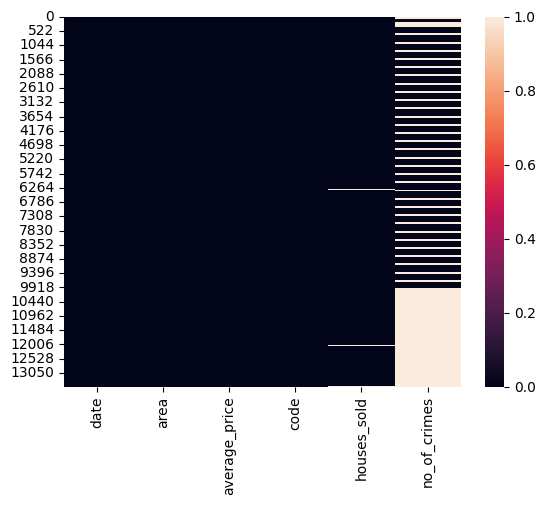

In [4]:
sns.heatmap(house.isna())

# 1. Convert the Datatype of 'Date' column to Date-Time format.

In [5]:
house['date'] = pd.to_datetime(house['date'])
house

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,england,250410,E92000001,NaN,NaN


# 2. Add a new column `year` beside `date` column in the dataframe, which contains years only.

In [10]:
house.insert(1, 'year', house['date'].dt.year)

ValueError: cannot insert year, already exists

In [7]:
house

,date,year,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,1995,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,1995,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,1995,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,1995,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...,...
13544,2019-09-01,2019,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,2019,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,2019,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,2019,england,250410,E92000001,NaN,NaN


# 3. Add a new column `month_num` as 3rd column in the dataframe, which contains month in numbers.

In [11]:
house.insert(2, 'month_num', house['date'].dt.month)
house

ValueError: cannot insert month_num, already exists

# 4. Add a new column `month_name` as 4th column in the dataframe, which contains the full month name.

In [13]:
house.insert(3, 'month_name', house['date'].dt.month_name())
house

,date,year,area,month_name,average_price,month_abbr,code,houses_sold,no_of_crimes,month_num
0,1995-01-01,1995,city of london,January,91449,Jan,E09000001,17.0,NaN,1
1,1995-02-01,1995,city of london,February,82203,Feb,E09000001,7.0,NaN,2
2,1995-03-01,1995,city of london,March,79121,Mar,E09000001,14.0,NaN,3
3,1995-04-01,1995,city of london,April,77101,Apr,E09000001,7.0,NaN,4
4,1995-05-01,1995,city of london,May,84409,May,E09000001,10.0,NaN,5
...,...,...,...,...,...,...,...,...,...,...
13544,2019-09-01,2019,england,September,249942,Sep,E92000001,64605.0,NaN,9
13545,2019-10-01,2019,england,October,249376,Oct,E92000001,68677.0,NaN,10
13546,2019-11-01,2019,england,November,248515,Nov,E92000001,67814.0,NaN,11
13547,2019-12-01,2019,england,December,250410,Dec,E92000001,NaN,NaN,12


# 5. Add a new column `month_abbr` as 5th column in the dataframe, which contains the abbreviated month name.

In [12]:
house.insert(4, 'month_abbr', house['date'].dt.strftime('%b'))
house

,date,year,area,average_price,month_abbr,code,houses_sold,no_of_crimes,month_num
0,1995-01-01,1995,city of london,91449,Jan,E09000001,17.0,NaN,1
1,1995-02-01,1995,city of london,82203,Feb,E09000001,7.0,NaN,2
2,1995-03-01,1995,city of london,79121,Mar,E09000001,14.0,NaN,3
3,1995-04-01,1995,city of london,77101,Apr,E09000001,7.0,NaN,4
4,1995-05-01,1995,city of london,84409,May,E09000001,10.0,NaN,5
...,...,...,...,...,...,...,...,...,...
13544,2019-09-01,2019,england,249942,Sep,E92000001,64605.0,NaN,9
13545,2019-10-01,2019,england,249376,Oct,E92000001,68677.0,NaN,10
13546,2019-11-01,2019,england,248515,Nov,E92000001,67814.0,NaN,11
13547,2019-12-01,2019,england,250410,Dec,E92000001,NaN,NaN,12


# 6. Show all the records where 'No. of Crimes' is 0. And, how many such records are there?

In [17]:
zero_crime = house[house['no_of_crimes'] == 0]
zero_crime

,date,year,area,month_name,average_price,month_abbr,code,houses_sold,no_of_crimes,month_num
72,2001-01-01,2001,city of london,January,284262,Jan,E09000001,24.0,0.0,1
73,2001-02-01,2001,city of london,February,198137,Feb,E09000001,37.0,0.0,2
74,2001-03-01,2001,city of london,March,189033,Mar,E09000001,44.0,0.0,3
75,2001-04-01,2001,city of london,April,205494,Apr,E09000001,38.0,0.0,4
76,2001-05-01,2001,city of london,May,223459,May,E09000001,30.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...
178,2009-11-01,2009,city of london,November,397909,Nov,E09000001,11.0,0.0,11
179,2009-12-01,2009,city of london,December,411955,Dec,E09000001,16.0,0.0,12
180,2010-01-01,2010,city of london,January,464436,Jan,E09000001,20.0,0.0,1
181,2010-02-01,2010,city of london,February,490525,Feb,E09000001,9.0,0.0,2


In [18]:
zero_crime['date'].count()

104

In [20]:
# alternative to find how many data
len(zero_crime)

104

# 7. What is the maximum & minimum 'average_price' per year in england?

In [23]:
max = house['average_price'].max()
min = house['average_price'].min()
print(f'maximum is {max} and minimum is {min}')

maximum is 1463378 and minimum is 40722


# 8. What is the Maximum & Minimum No. of Crimes recorded per area ?

In [24]:
max = house['no_of_crimes'].max()
min = house['no_of_crimes'].min()
print(f'maximum is {max} and minimum is {min}')

maximum is 7461.0 and minimum is 0.0


# 9. Show the total count of records of each area, where average price is less than 100000.

In [29]:
records_per_area = house[house['average_price'] < 100000].area.value_counts().reset_index()
records_per_area

,area,count
0,north east,112
1,north west,111
2,yorks and the humber,110
3,east midlands,96
4,west midlands,94
5,england,87
6,barking and dagenham,85
7,south west,78
8,east of england,76
9,newham,72


<Axes: xlabel='area', ylabel='count'>

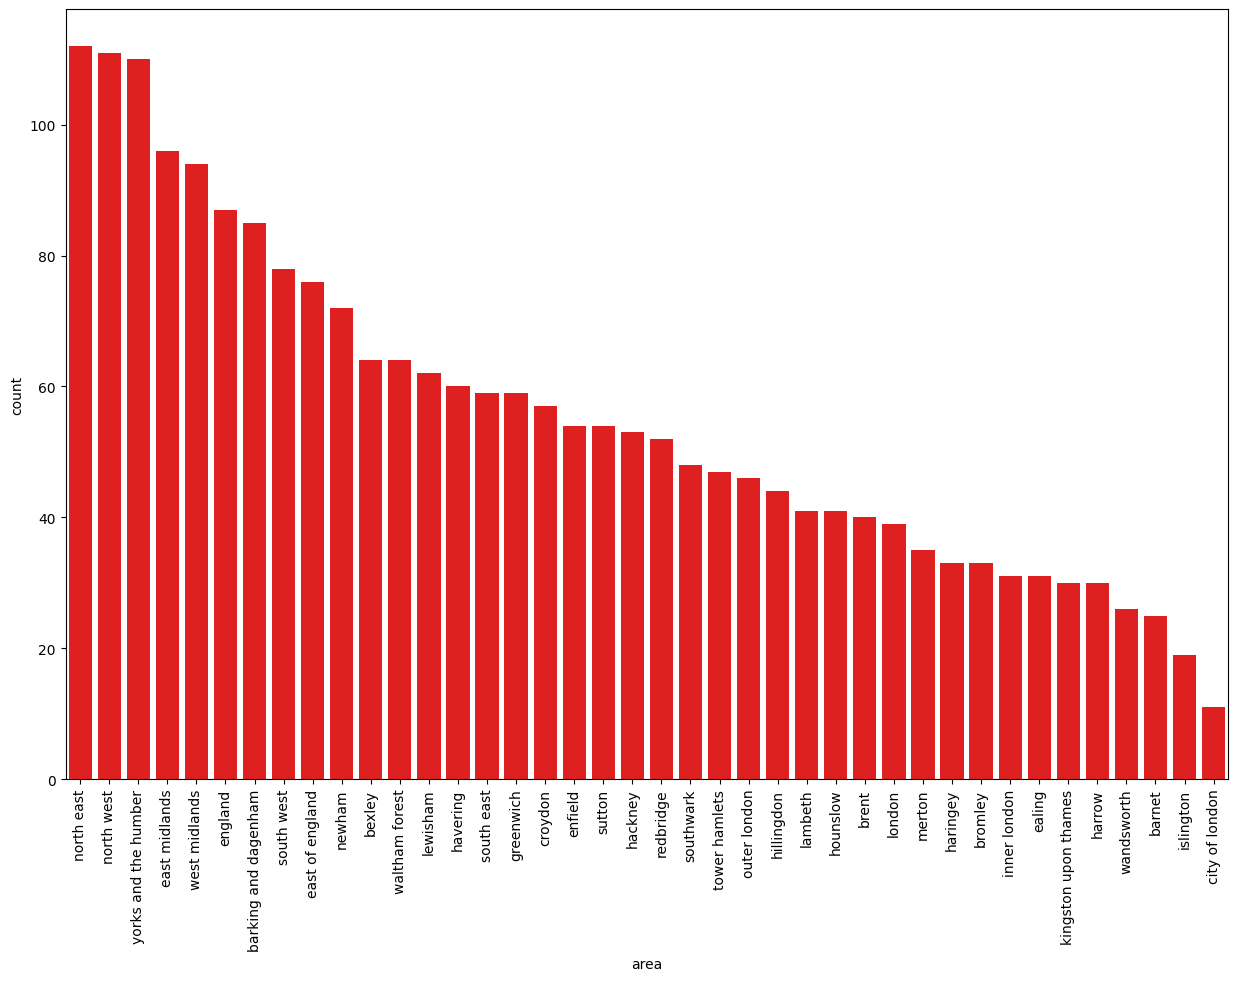

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(data=records_per_area, x='area', y='count', ax=ax, color='r')